# Bar Charts and Analyzing Data from CSVs

### Working With Bar Charts

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

In [2]:
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

<BarContainer object of 11 artists>

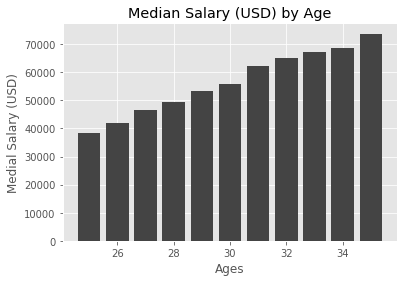

In [3]:
# Using bar plots

plt.xlabel("Ages")
plt.ylabel("Medial Salary (USD)")
plt.title("Median Salary (USD) by Age")

plt.bar(ages_x, dev_y, color = "#444444", label = "All Devs")

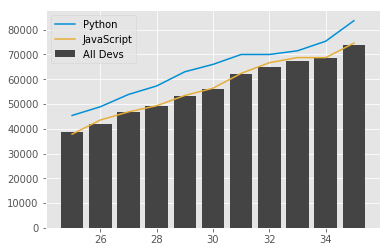

In [4]:
# Combining bar and line plots

js_dev_y = [37810, 43515, 46823, 49293, 53437, 
            56373, 62375, 66674, 68745, 68746, 74583]
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]

plt.bar(ages_x, dev_y, color = "#444444", label = "All Devs")
plt.plot(ages_x, py_dev_y, color = "#008fd5", label = "Python")
plt.plot(ages_x, js_dev_y, color = "#e5ae38", label = "JavaScript")

plt.legend()

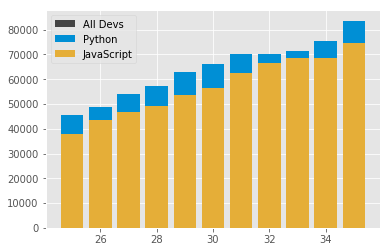

In [5]:
# Having multiple bar-graphs on the same plot

plt.bar(ages_x, dev_y, color = "#444444", label = "All Devs")
plt.bar(ages_x, py_dev_y, color = "#008fd5", label = "Python")
plt.bar(ages_x, js_dev_y, color = "#e5ae38", label = "JavaScript")

plt.legend()

# This approach is not the correct one, as all the bars overlap one another

In [6]:
# In order to have the bars display side by side we need to have use numpy to define a new x-axis

import numpy as np

x_indices = np.arange(len(ages_x))

In [7]:
x_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

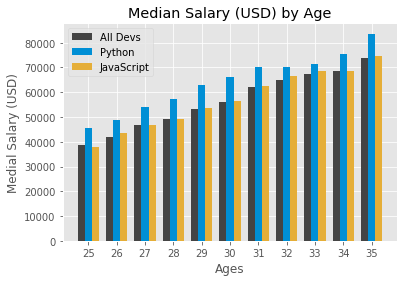

In [8]:
width = 0.25 # custom bar width

# Shift first set of bars to the left by one bar width
# Shift thrid set of bars to the right by one bar width
# Also tell our .bar() methods that we want to use our custom bar width instead of the default (width = width)

plt.bar(x_indices - width, dev_y, color = "#444444", width = width, label = "All Devs")
plt.bar(x_indices, py_dev_y, color = "#008fd5", width = width, label = "Python")
plt.bar(x_indices + width, js_dev_y, color = "#e5ae38", width = width, label = "JavaScript")

# Now the x axis will display the values in x_indices, not ages_x
# To fix this we need to specify that we want to show the ages and not the values of x_indices on the x axis
# use plt.xticks() - matches a set of ticks with a set of labels

plt.xticks(ticks = x_indices, labels = ages_x)

plt.xlabel("Ages")
plt.ylabel("Medial Salary (USD)")
plt.title("Median Salary (USD) by Age")

plt.legend()

### Loading Data From a CSV File

In [9]:
# Using standard library: csv
import csv

# We want to plot the popularity of each language, 
# therefore we need to keep a count of the number of occurances of each lnaguage in the CSV file.
# To do that we will use the Counter standard library from collections
from collections import Counter

with open('Data/data.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file) #csv_reader is iterable
    language_counter = Counter()
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))

In [27]:
language_counter.most_common() # Counter list sorted by descending value
language_counter.most_common(15) # Same but limited to first 15 entries

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523),
 ('C', 18017),
 ('Other(s):', 7920),
 ('Ruby', 7331),
 ('Go', 7201),
 ('Assembly', 5833)]

In [28]:
# Splitting the tuple list into two lists (x, y)
languages = [item[0] for item in language_counter.most_common(15)]
popularity = [item[1] for item in language_counter.most_common(15)]

Text(0, 0.5, 'Number of Users')

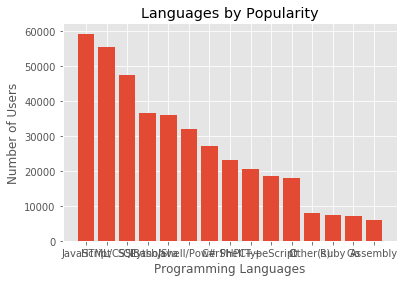

In [32]:
# Plotting the values

plt.bar(languages, popularity)

plt.title("Languages by Popularity")
plt.xlabel("Programming Languages")
plt.ylabel("Number of Users")

Text(0.5, 0, 'Number of Users')

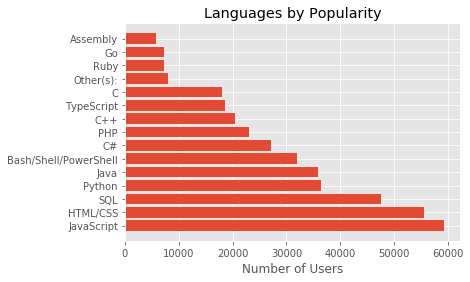

In [40]:
# Vertical bar chart is not quite readable, therefore let us switch to a horizontal bar chart.

plt.barh(languages, popularity)

plt.title("Languages by Popularity")
plt.xlabel("Number of Users")
# plt.ylabel("Programming Languages") # Label is redundant

Text(0.5, 0, 'Number of Users')

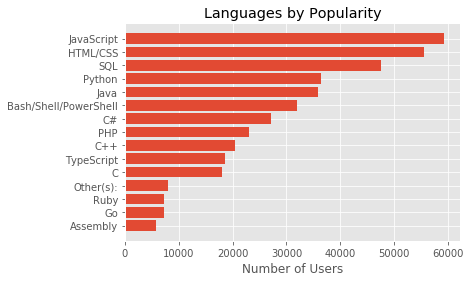

In [41]:
# Looks much better, however, the most popular language is at the bottom
# If we want it at the top we can simply reverse the respective lists

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Languages by Popularity")
plt.xlabel("Number of Users")

### Loading Data Using Pandas

In [42]:
import pandas as pd

data = pd.read_csv('Data/data.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

Text(0.5, 0, 'Number of Users')

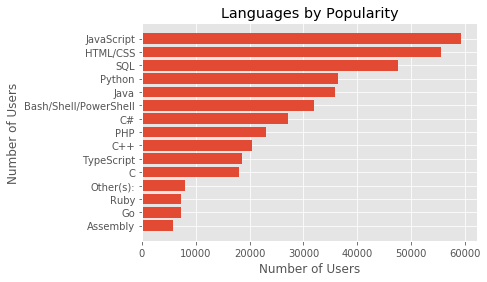

In [50]:
language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(";"))
    
languages = [item[0] for item in language_counter.most_common(15)]
popularity = [item[1] for item in language_counter.most_common(15)]

plt.title("Languages by Popularity")
plt.xlabel("Programming Languages")
plt.ylabel("Number of Users")

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Languages by Popularity")
plt.xlabel("Number of Users")